In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('..')
import random, math, os
import pyzx as zx
from fractions import Fraction
import numpy as np
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\Quantomatic.jar'
zx.tikz.tikzit_location = r'C:\Users\John\Documents\tikzit\tikzit.exe'

In [3]:
circ_name = r'../circuits/Fast/Adder8_before'
#circ_name = "../circuits/PF/pf4_10_after"
#circ_name = r'../circuits/broken/cycle_17_3.qc'
c_orig = zx.Circuit.load(circ_name)
#c_orig = zx.Circuit.load(circ_name)
print(c_orig.to_basic_gates().stats())
#display(zx.draw(c_orig,figsize=(10,3),h_edge_draw='box'))
g = c_orig.to_graph()
zx.simplify.full_reduce(g,quiet=True)
g.normalise()
print(zx.tcount(g))
print("vertex count", len(list(g.vertices())))
#zx.d3.draw(g)

Circuit Adder8_before on 23 qubits with 637 gates.
        266 is the T-count
        371 Cliffords among which 
        243 2-qubit gates and 76 Hadamard gates.
56
vertex count 165


In [3]:
c = zx.Circuit(3)
c.add_gate("TOF",0,1,2)
g = c.to_basic_gates().to_graph()

In [4]:
zx.editor.edit(g)

ZXEditorWidget(graph_buttons='{"spider": {"active": false, "text": "fuse spiders", "tooltip": "Fuses connected…

ZXEditorWidget(graph_buttons='{"spider": {"active": false, "text": "fuse spiders", "tooltip": "Fuses connected…

In [7]:
c = zx.Circuit.load(circ_name)
with open("circuit.qc", 'w') as f:
    f.write(c.to_qc())

In [137]:
c = zx.generate.CNOT_HAD_PHASE_circuit(6,20,p_had=0.2,p_t=0.3,clifford=False)
g = c.to_graph()
g.apply_state("++--01")
zx.full_reduce(g)
zx.d3.draw(g)

In [138]:
terms = zx.simulate.find_stabilizer_decomp(g)
len(terms)

1

In [121]:
m1 = sum(h.to_matrix() for h in terms)
m2 = g.to_matrix()

In [123]:
sum(abs(a)**2 for a in m1.flatten())

0.9999999999999991

In [94]:
estimate_norm(terms)

0.9745948548261619

In [3]:
def make_terms(q, amount):
    terms = []
    for _ in range(amount):
        g = zx.generate.CNOT_HAD_PHASE_circuit(q,2*q*q,p_had=0.2,p_t=0.3,clifford=True).to_graph()
        g.apply_state("+"*q)
        zx.full_reduce(g)
        terms.append(g)
    return zx.simulate.SumGraph(terms)

In [6]:
xs = [4,8,12,16,20, 24, 28, 32, 36, 40, 44, 48, 52]

ys = []

reps = 40

import time
for x in xs:
    print(x, end='.')
    gsum = make_terms(x, reps)
    t1 = time.time()
    gsum.estimate_norm(epsilon=0.28)
    t = time.time() - t1
    ys.append(t)

4.8.12.16.20.24.28.32.36.40.44.48.52.

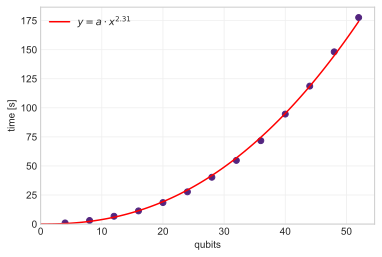

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax1 = fig.add_subplot(111)

colours = ['#53257f', '#bc1b73', '#f8534a', '#ffa600']
#names = ['time to estimate','optimized','extracted-block', 'extracted']
styles = ['-','--','-.',':']

x = np.array(xs); y = np.array(ys)
ax1.scatter(x, y, c=colours[0], marker="o")#,markersize=3, linestyle=styles[0])#, label=names[i])

c = np.polyfit(np.log(x),np.log(y),1, w=np.sqrt(y))  #  Generate power law fit
a = np.linspace(0,max(x),100); b = (math.e**c[1])*a**c[0]
ax1.plot(a,b,'-',color='red',label="$y = a\cdot x^{{{:.2f}}}$".format(c[0]))  # Plot the fit

ax1.set_ylabel("time [s]")
ax1.set_xlabel("qubits")

plt.ylim(ymin=0); plt.xlim(xmin=0); 
plt.legend(loc='upper left');
plt.grid(color='#EEEEEE')
plt.show()

In [10]:
a = set([1,2,3])
a.difference_update([3,4])
a

{1, 2}

In [139]:
gsum = zx.simulate.SumGraph(terms)

In [140]:
gs2 = gsum.post_select(1, '+')
gs2.full_reduce()
gs3 = gsum.post_select(1, '-')
gs3.full_reduce()

In [141]:
p1 = gs2.estimate_norm() 
p2 = gs3.estimate_norm()
print(p1, p2, p1+p2)

1.0106249999999999 3.798610324523221e-33 1.0106249999999999


In [95]:
l = [2,3,4]
l.pop(1)

3

In [96]:
l

[2, 4]

In [73]:
import itertools
q = 6
l = [(i1,i2) for i1 in range(q) for i2 in range(i1+1,q) if random.random() > 0.5]
l

[(0, 1), (0, 2), (0, 4), (0, 5), (1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]

In [45]:
val = sum([abs(zx.simulate.inner_product_with_random_state(g).to_number())**2 for i in range(1000)])/1000
val

0.997

In [21]:
abs(val)

0.019313207915827958

In [17]:
%debug

> c:\users\john\documents\projects\pyzx\pyzx\simulate.py(192)inner_product_with_random_state()
    190     # Since the diagram is a scalar, full_reduce() will completely annihilate it.
    191     simplify.full_reduce(g)
--> 192     if g.num_vertices() != 0: raise Exception("Diagram wasn't fully reduced")
    193     return g.scalar
    194 

ipdb> g
Graph(2 vertices, 0 edges)
ipdb> zx.d3.draw(g)
*** NameError: name 'zx' is not defined
ipdb> g.edges()
<generator object GraphS.edges at 0x00887670>
ipdb> list(g.edges())
*** Error in argument: '(g.edges())'
ipdb> g.edges()
<generator object GraphS.edges at 0x00887730>
ipdb> set(g.edges())
set()
ipdb> g.vertices()
dict_keys([7, 9])
ipdb> g.neighbours(7)
dict_keys([])
ipdb> q


In [77]:
g.apply_state("+"*12+"0"*11)
#g.apply_effect("+011-1-")
#zx.simplify.clifford_simp(g,quiet=False)
#zx.simplify.full_reduce(g,quiet=False)
zx.simplify.spider_simp(g,quiet=False)
zx.simplify.to_gh(g)
zx.simplify.spider_simp(g,quiet=False)
zx.simplify.id_simp(g,quiet=False)
zx.simplify.spider_simp(g,quiet=False)
zx.simplify.pivot_simp(g,quiet=False)
zx.simplify.pivot_gadget_simp(g,quiet=False)
zx.simplify.gadget_simp(g,quiet=False)
zx.simplify.id_simp(g,quiet=False)
zx.simplify.spider_simp(g,quiet=False)
zx.simplify.pivot_simp(g,quiet=False)
#zx.simplify.id_simp(g,quiet=False)
#zx.simplify.pivot_gadget_simp(g,quiet=False)
#zx.simplify.gadget_simp(g,quiet=False)
#zx.simplify.id_simp(g,quiet=False)
#zx.simplify.spider_simp(g,quiet=False)
print(zx.tcount(g))
#zx.simplify.reduce_scalar(g)
zx.tcount(g)
#zx.draw(g)

spider_simp: 8.  1 iterations
spider_simp: 7. 3.  2 iterations
id_simp: 9. 1.  2 iterations
pivot_simp: 8. 2.  2 iterations
pivot_gadget_simp: 1.  1 iterations
gadget_simp: 4.  1 iterations
id_simp: 3.  1 iterations
spider_simp: 3.  1 iterations
pivot_simp: 1. 1.  2 iterations
48


48

In [78]:
zx.d3.draw(g)

In [31]:
terms = zx.simulate.find_stabilizer_decomp(g)
len(terms)

1453

In [32]:
zx.simulate.max_terms_needed(g)

2401

In [33]:
zx.d3.draw(terms[3])

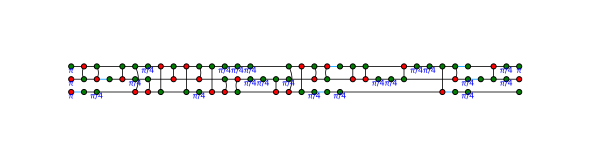

(0.02588834764831879+0.23927669529663823j)
pivot_gadget_simp: 1.  1 iterations


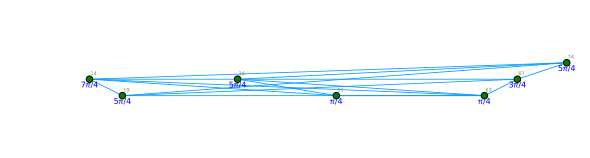

None

[(67, 19, 2, {74, 14, 63})]
supplementarity_simp: 1. [(51, 63, 2, {34, 14})]
1.  2 iterations
(0.025888347648318488+0.23927669529663667j)


None

In [3]:
random.seed(437887)
qubits = 3
depth = 50
c = zx.generate.CNOT_HAD_PHASE_circuit(qubits,depth,p_had=0.1, p_t=0.3)
g = c.to_graph()
g.apply_state(''.join(random.choice('+-01') for _ in range(qubits)))
g.apply_effect(''.join(random.choice('+-01') for _ in range(qubits)))
display(zx.draw(g))
t = g.to_tensor()
print(t)
g2 = g.copy()
zx.simplify.clifford_simp(g2,quiet=True)
zx.simplify.pivot_gadget_simp(g2,quiet=False)
display(zx.draw(g2,labels=True))
display(zx.d3.draw(g2))
zx.simplify.reduce_scalar(g2,quiet=False)
print(g2.to_tensor())
display(zx.d3.draw(g2))
#g2 = g.copy()
#zx.simplify.full_reduce(g2,quiet=False)
#display(zx.d3.draw(g2))
#print(g2.to_tensor())

In [5]:
print(zx.tcount(g))
%timeit zx.simulate.calculate_path_sum(g)
#zx.spider_simp(g3,quiet=True)
#zx.d3.draw(g3)

33
56.9 ms ± 327 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
gsum = zx.simulate.replace_magic_states(g)

In [7]:
gsum.full_reduce()

In [8]:
gsum.graphs

[Graph(41 vertices, 117 edges),
 Graph(41 vertices, 117 edges),
 Graph(42 vertices, 114 edges),
 Graph(42 vertices, 114 edges),
 Graph(0 vertices, 0 edges),
 Graph(42 vertices, 106 edges),
 Graph(42 vertices, 104 edges)]

In [48]:
qubits =9
test = zx.Circuit(qubits)
for i in range(qubits):
    test.add_gate("T",i)
g = test.to_graph()
g.apply_state("+"*qubits)
#g.apply_effect("++++++")
#m = g.to_matrix()
#display(zx.draw(g,labels=True))
zx.simplify.spider_simp(g,quiet=False)
#g.scalar.add_power(0)
#m2 = g.to_matrix()

spider_simp: 9.  1 iterations


1

In [71]:
decomp = zx.simulate.find_stabilizer_decomp(g)

In [72]:
len(decomp)

28

In [47]:
sum([h.to_matrix() for h in decomp])

array([[ 0.35355339+0.j        ],
       [ 0.25      +0.25j      ],
       [ 0.25      +0.25j      ],
       [ 0.        +0.35355339j],
       [ 0.25      +0.25j      ],
       [ 0.        +0.35355339j],
       [-0.        +0.35355339j],
       [-0.25      +0.25j      ]])

In [24]:
sum([h.to_matrix() for h in decomp])

array([[ 0.5       +0.j        ],
       [ 0.35355339+0.35355339j],
       [ 0.35355339+0.35355339j],
       [ 0.        +0.5j       ],
       [ 0.35355339+0.35355339j],
       [-0.        +0.5j       ],
       [ 0.        +0.5j       ],
       [-0.35355339+0.35355339j]])

In [25]:
g.to_matrix()

array([[ 0.35355339+0.j        ],
       [ 0.25      +0.25j      ],
       [ 0.25      +0.25j      ],
       [ 0.        +0.35355339j],
       [ 0.25      +0.25j      ],
       [ 0.        +0.35355339j],
       [ 0.        +0.35355339j],
       [-0.25      +0.25j      ]])

In [11]:
gsum.graphs[0]

Graph(5 vertices, 4 edges)

In [62]:
gsum.graphs

[Graph(30 vertices, 39 edges),
 Graph(30 vertices, 39 edges),
 Graph(20 vertices, 26 edges),
 Graph(21 vertices, 26 edges),
 Graph(14 vertices, 15 edges),
 Graph(21 vertices, 27 edges),
 Graph(21 vertices, 27 edges)]

In [63]:
[zx.tcount(h) for h in gsum.graphs]

[9, 9, 3, 3, 0, 3, 3]

In [66]:
zx.compare_tensors(c_orig.to_tensor(True),gsum.to_tensor(),True)

True

In [51]:
def gadget_H(c):
    try:
        # turn the last HAD into a CZ
        i = next(i for i in reversed(range(len(c.gates))) if c.gates[i].name == 'HAD')
        c.qubits += 1
        q = c.gates[i].target
        c.gates[i] = zx.circuit.CZ(q, q+1)
        
        # before gadget: nudge every qubit to the right of HAD over by 1
        for j in range(0,i):
            g = c.gates[j]
            if g.target > q: g.target += 1
            if hasattr(g, 'control') and g.control > q: g.control += 1
        
        # after gadget: nudge HAD's qubit and all qubits to the right of HAD over by 1
        for j in range(i+1,len(c.gates)):
            g = c.gates[j]
            if g.target >= q: g.target += 1
            if hasattr(g, 'control') and g.control >= q: g.control += 1
        
        return i
    except StopIteration:
        return None

def gadget_all_H(c):
    while gadget_H(c) != None: pass

In [89]:
def hcap_optimize(c,hcap):
    total = 0
    parsed = []
    hcount = 0
    blocks = 0
    for g in c.gates:
        if g.name == 'HAD':
            if hcount == hcap:
                new_c = zx.Circuit(c.qubits)
                new_c.gates = [h.copy() for h in parsed]
                gadget_all_H(new_c)
                print("block", blocks)
                opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
                print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
                total += opt_c.tcount()
                hcount = 0
                blocks += 1
                parsed = []
            else:
                parsed.append(g)
                hcount += 1
        else:
            parsed.append(g)
    if parsed:
        new_c = zx.Circuit(c.qubits)
        new_c.gates = [h.copy() for h in parsed]
        gadget_all_H(new_c)
        print("block", blocks)
        opt_c = zx.optimize.phase_block_optimize(new_c, pre_optimize=False,quiet=True)
        print("tcount:", new_c.tcount(), "-->", opt_c.tcount())
        total += opt_c.tcount()
    return total

In [90]:
zx.todd.TOPT_LOCATION = ['C:\\WINDOWS\\SysNative\\wsl', '/mnt/c/Users/John/Documents/Projects/pyzx/TOpt']
#zx.todd.TOPT_LOCATION = None

In [101]:
circ_name = r'../circuits/Fast/barenco_tof_10_before'
c_orig = zx.Circuit.load(circ_name)
g = c_orig.to_graph()
print(zx.tcount(g))
g = zx.simplify.teleport_reduce(g)
c = zx.Circuit.from_graph(g).to_basic_gates()
#c = c_orig.to_basic_gates().copy()
print(c.stats())
c = zx.optimize.basic_optimization(c.split_phase_gates())
c = zx.optimize.basic_optimization(c.to_basic_gates())
print(c.to_basic_gates().stats())

hcap_optimize(c,15)

224
Circuit  on 19 qubits with 445 gates.
        100 is the T-count
        345 Cliffords among which 
        192 2-qubit gates and 98 Hadamard gates.
Circuit  on 19 qubits with 365 gates.
        100 is the T-count
        265 Cliffords among which 
        176 2-qubit gates and 34 Hadamard gates.
block 0
tcount: 48 --> 48
block 1
tcount: 39 --> 39
block 2
tcount: 13 --> 13


100

In [84]:
c2 = zx.optimize.phase_block_optimize(c.to_basic_gates(), pre_optimize=False,quiet=True)

In [85]:
print(c2.stats())

Circuit  on 19 qubits with 660 gates.
        100 is the T-count
        560 Cliffords among which 
        464 2-qubit gates and 34 Hadamard gates.


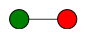

We will now set the phase of the spiders to a different value:


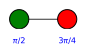

In [113]:
import pyzx as zx  #  This is the recommended way to import PyZX
g = zx.Graph()  #  We construct an empty ZX-diagram
v = g.add_vertex(1,0,0)  #  We add a single Z-spider at position (0,0)
w = g.add_vertex(2,0,1)  #  We add a single X-spider at position (0,1)
g.add_edge((v,w))        #  We connect the two spiders together
display(zx.draw(g,figsize=(1,0.3))) #  Draw the ZX-diagram onto the screen
print("We will now set the phase of the spiders to a different value:")
from fractions import Fraction    #   For this we need the Fraction class
g.set_phase(v,Fraction(1,2))      # The phase is set as a multiple of pi
g.set_phase(w,Fraction(3,4))
display(zx.draw(g,figsize=(1,0.3)))

# Hadamard to Internal Vertices comparison

In [80]:
from pyzx.circuit import ZPhase
def count_internal_hadamards(c):
    count = 0
    tracking = dict()
    for g in c.gates:
        if g.name == 'HAD':
            if g.target not in tracking: continue
            else: tracking[g.target] += 1
        if isinstance(g, ZPhase) and g.phase.denominator > 2:
            if g.target in tracking: 
                count += tracking[g.target]
            tracking[g.target] = 0
    return count

def count_all_hadamards(c):
    return sum(1 for g in c.gates if g.name == 'HAD')

In [14]:
def count_internal_vertices(g):
    count = 0
    for v in g.vertices():
        if v in g.inputs or v in g.outputs: continue
        if len(list(g.neighbours(v))) == 1: continue
        should_continue = False
        for w in g.neighbours(v):
            if len(list(g.neighbours(w))) == 1:
                should_continue = True
                break
        if should_continue: continue
        count += 1
    return count

In [13]:
c = zx.optimize.basic_optimization(c_orig.to_basic_gates()).to_basic_gates()

count_internal_hadamards(c)

6

In [15]:
count_internal_vertices(g)

5

In [13]:
def generate_random_circuit(qubits, depth, p_had, p_t, clifford=False):
    p_cnot = 1-p_had-p_t
    c = zx.Circuit(qubits)
    for _ in range(depth):
        r = random.random()
        if r > 1-p_had:
            c.add_gate("HAD",random.randrange(qubits))
        elif r > 1-p_had-p_t:
            if not clifford: c.add_gate("T",random.randrange(qubits))
            else: c.add_gate("S",random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl!=tgt: break
            c.add_gate("CNOT",tgt,ctrl)
    return c

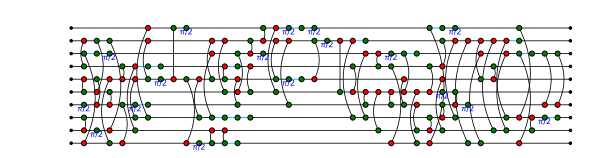

In [18]:
c = generate_random_circuit(10,100,p_had=0.2,p_t=0.2,clifford=True)
zx.draw(c)

In [19]:
g = c.to_graph()
zx.simplify.clifford_simp(g,quiet=True)
g.normalise()
zx.d3.draw(g)

In [116]:
count_all_hadamards(c)

14

In [117]:
count_internal_vertices(g)

9

In [102]:
def generate_data_point(qubits, depth, p_had, p_t):
    c = generate_random_circuit(qubits, depth, p_had, p_t)
    c = zx.optimize.basic_optimization(c).to_basic_gates()
    had = count_all_hadamards(c)
    g = c.to_graph()
    zx.simplify.full_reduce(g)
    vert = count_internal_vertices(g)
    return (had,vert)

x,y = [],[]
for i in range(1,101):
    had,vert = generate_data_point(15, 50+i*10, p_had = 0.1, p_t = 0.15)
    x.append(had)
    y.append(vert)
    if i%10 == 0: print(i,end='. ')

10. 20. 30. 40. 50. 60. 70. 80. 90. 100. 

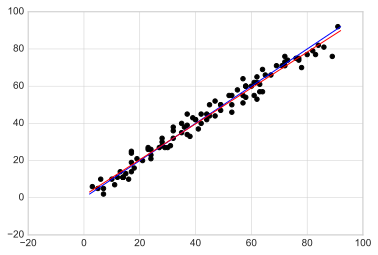

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-whitegrid')
x = np.array(x)
y = np.array(y)
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

mi = min([min(x),min(y)])
ma = max([max(x),max(y)])
plt.scatter(x, y,color='black')
plt.plot([mi,ma],[mi,ma],'-',color='blue')
xfit = np.linspace(mi,ma,100)
yfit = model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit,'-',color='red');

In [108]:
model.coef_

array([0.96390216])

# Experimental extraction code

In [5]:
from pyzx import Graph, tcount
from pyzx import Circuit
from pyzx.extract import bi_adj, connectivity_from_biadj, permutation_as_swaps
from pyzx.linalg import column_optimal_swap
from pyzx.rules import apply_rule, pivot
from pyzx.simplify import id_simp

def extract(g, allow_ancillae=False, quiet=True, stopcount=-1):
    """Given a graph put into semi-normal form by :func:`simplify.full_reduce`, 
    it extracts its equivalent set of gates into an instance of :class:`circuit.Circuit`.
    """
    #g.normalise()
    qs = g.qubits() # We are assuming that these are objects that update...
    rs = g.rows()   # ...to reflect changes to the graph, so that when...
    ty = g.types()  # ... g.set_row/g.set_qubit is called, these things update directly to reflect that
    phases = g.phases()
    c = Circuit(g.qubit_count())

    gadgets = {}
    for v in g.vertices():
        if g.vertex_degree(v) == 1 and v not in g.inputs and v not in g.outputs:
            n = list(g.neighbours(v))[0]
            gadgets[n] = v
    
    qubit_map = dict()
    frontier = []
    for o in g.outputs:
        v = list(g.neighbours(o))[0]
        if v in g.inputs: continue
        frontier.append(v)
        qubit_map[v] = qs[o]
    
    while True:
        # preprocessing
        for v in frontier:
            q = qubit_map[v]
            if phases[v]: c.add_gate("ZPhase", q, phases[v])
            g.set_phase(v,0)
            for w in list(g.neighbours(v)):
                if w in g.outputs:
                    e = g.edge(v,w)
                    if g.edge_type(e) == 2: # Hadamard edge
                        c.add_gate("HAD",q)
                        g.set_edge_type(e,1)
                elif w in frontier:
                    c.add_gate("CZ",q, qubit_map[w])
                    g.remove_edge(g.edge(v,w))
        # Check for connectivity to inputs
        neighbours = set()
        for v in frontier.copy():
            d = [w for w in g.neighbours(v) if w not in g.outputs]
            if any(w in g.inputs for w in d):
                if len(d) == 1: # Only connected to input, remove from frontier
                    frontier.remove(v)
                    continue
                # We disconnect v from the input b via a new spider
                b = [w for w in d if w in g.inputs][0]
                q = qs[b]
                r = rs[b]
                w = g.add_vertex(1,q,r+1)
                e = g.edge(v,b)
                et = g.edge_type(e)
                g.remove_edge(e)
                g.add_edge((v,w),2)
                g.add_edge((w,b),3-et)
                d.remove(b)
                d.append(w)
            neighbours.update(d)
        if not frontier: break # We are done
            
        neighbours = list(neighbours)
        m = bi_adj(g,neighbours,frontier)
        m.gauss(full_reduce=True)
        max_vertices = []
        for l in m.data:
            if sum(l) == 1: 
                i = [i for i,j in enumerate(l) if j == 1][0]
                max_vertices.append(neighbours[i])
        if max_vertices:
            print("Reducing", len(max_vertices), "vertices")
            for v in max_vertices: neighbours.remove(v)
            neighbours = max_vertices + neighbours
            m = bi_adj(g,neighbours,frontier)
            cnots = m.to_cnots()
            for cnot in cnots:
                m.row_add(cnot.target,cnot.control)
                c.add_gate("CNOT",qubit_map[frontier[cnot.control]],qubit_map[frontier[cnot.target]])
            connectivity_from_biadj(g,m,neighbours,frontier)
            good_verts = dict()
            for i, row in enumerate(m.data):
                if sum(row) == 1:
                    v = frontier[i]
                    w = neighbours[[j for j in range(len(row)) if row[j]][0]]
                    good_verts[v] = w
            for v,w in good_verts.items():
                c.add_gate("HAD",qubit_map[v])
                qubit_map[w] = qubit_map[v]
                b = [o for o in g.neighbours(v) if o in g.outputs][0]
                g.remove_vertex(v)
                g.add_edge((w,b))
                frontier.remove(v)
                frontier.append(w)
            print("Vertices extracted:", len(good_verts))
            continue
        else:
            print("No maximal vertex found. Pivoting on gadgets")
            print("Gadgets before:", len(gadgets))
            for w in neighbours:
                if w not in gadgets: continue
                for v in g.neighbours(w):
                    if v in frontier:
                        apply_rule(g,pivot,[(w,v,[],[o for o in g.neighbours(v) if o in g.outputs])])
                        frontier.remove(v)
                        del gadgets[w]
                        frontier.append(w)
                        qubit_map[w] = qubit_map[v]
                        break
            print("Gadgets after:", len(gadgets))
            continue
            
    # Outside of loop. Finish up the permutation
    id_simp(g,quiet=True) # Now the graph should only contain inputs and outputs
    swap_map = {}
    leftover_swaps = False
    for v in g.outputs: # Finally, check for the last layer of Hadamards, and see if swap gates need to be applied.
        q = qs[v]
        i = list(g.neighbours(v))[0]
        if i not in g.inputs: 
            raise TypeError("Algorithm failed: Not fully reducable")
            return c
        if g.edge_type(g.edge(v,i)) == 2:
            c.add_gate("HAD", q)
            g.set_edge_type(g.edge(v,i),1)
        if qs[i] != q: leftover_swaps = True
        swap_map[q] = qs[i]
    if leftover_swaps: 
        for t1, t2 in permutation_as_swaps(swap_map):
            c.add_gate("SWAP", t1, t2)
    # Since we were extracting from right to left, we reverse the order of the gates
    c.gates = list(reversed(c.gates))
    return c

Reducing 1 vertices
Vertices extracted: 1
Reducing 3 vertices
Vertices extracted: 3


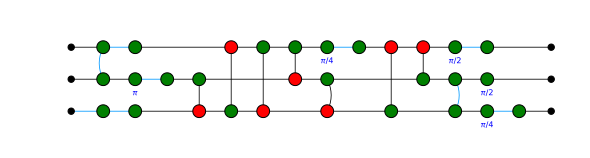

True


In [21]:
seed = 132648
qubits = 3
depth = 20
random.seed(seed)
circ = zx.generate.cliffordT(qubits,depth,p_t=0.2)
g = circ.copy()
zx.simplify.clifford_simp(g,quiet=True)
zx.d3.draw(g)
c = zx.extract.modified_extract(g,quiet=False)
display(zx.draw(c))
print(zx.compare_tensors(circ,c,False))

In [27]:
g2 = g.copy()
c = extract(g2,quiet=False)

Reducing 5 vertices
Vertices extracted: 5
No maximal vertex found. Pivoting on gadgets
Gadgets before: 48
Gadgets after: 41
Reducing 4 vertices
Vertices extracted: 4
Reducing 1 vertices
Vertices extracted: 1
No maximal vertex found. Pivoting on gadgets
Gadgets before: 41
Gadgets after: 38
Reducing 2 vertices
Vertices extracted: 2
No maximal vertex found. Pivoting on gadgets
Gadgets before: 38
Gadgets after: 37
Reducing 1 vertices
Vertices extracted: 1
No maximal vertex found. Pivoting on gadgets
Gadgets before: 37
Gadgets after: 36
Reducing 1 vertices
Vertices extracted: 1
Reducing 3 vertices
Vertices extracted: 3
Reducing 1 vertices
Vertices extracted: 1
No maximal vertex found. Pivoting on gadgets
Gadgets before: 36
Gadgets after: 33
Reducing 2 vertices
Vertices extracted: 2
Reducing 1 vertices
Vertices extracted: 1
No maximal vertex found. Pivoting on gadgets
Gadgets before: 33
Gadgets after: 31
Reducing 2 vertices
Vertices extracted: 2
No maximal vertex found. Pivoting on gadgets
G

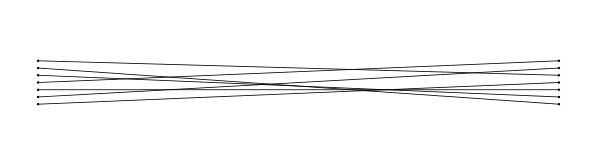

In [28]:
zx.draw(g2)

In [29]:
zx.compare_tensors(c_orig,c,False)

False

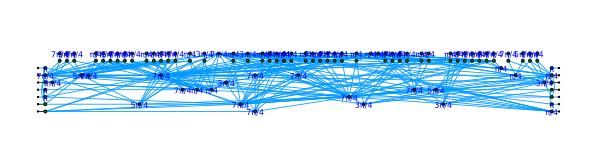

In [24]:
zx.draw(g)

spider_simp: 12. 10. 7. 3. 2.  5 iterations
id_simp: 15. 5.  2 iterations
spider_simp: 2.  1 iterations
pivot_simp: 3. 1.  2 iterations
lcomp_simp: 3. 2. 1.  3 iterations
id_simp: 1.  1 iterations


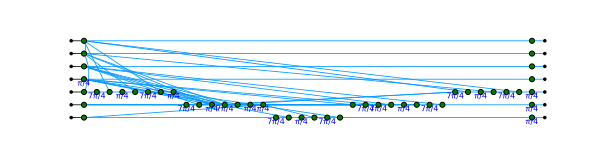

In [28]:
g = c_orig.to_graph()
g = zx.simplify.teleport_reduce(g)
zx.simplify.interior_clifford_simp(g)
#zx.simplify.full_reduce(g)
g.normalise()
zx.draw(g)
#zx.optimize.basic_optimization

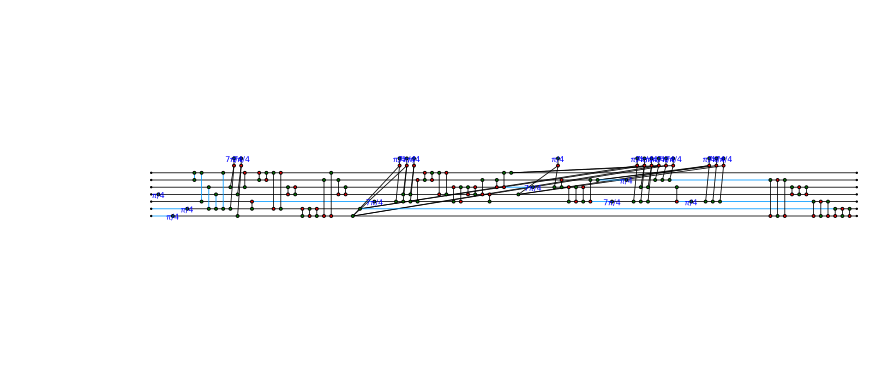

In [20]:
g2 = g.copy()
h = extract(g2)
zx.id_simp(h,quiet=True)
zx.draw(h,figsize=(12,5))
# m2 = m.copy()
# m2.gauss(full_reduce=True)
# print(m2)

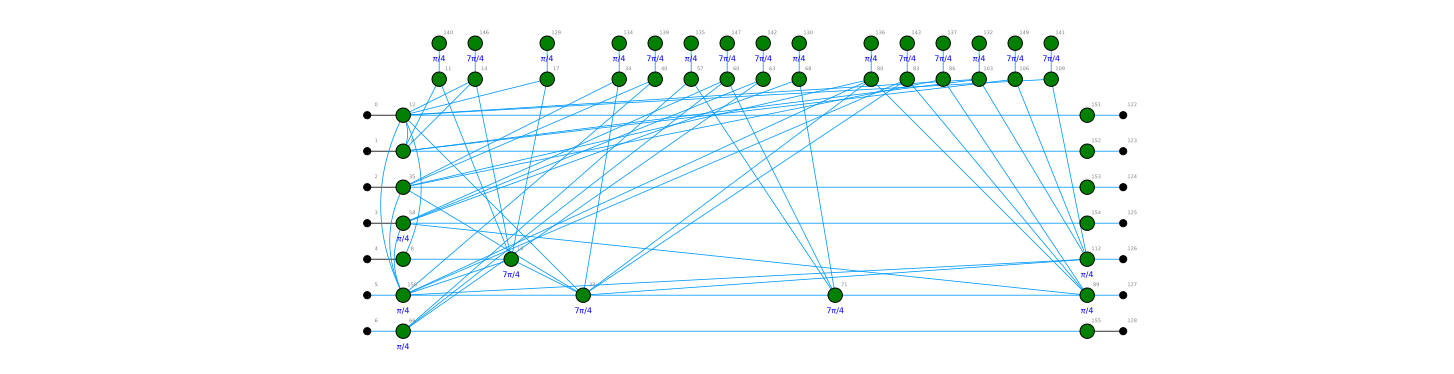

In [17]:
zx.draw(g, figsize=(20,5),labels=True)

In [18]:
print(h)

Graph(180 vertices, 243 edges)


In [120]:
zx.compare_tensors(h,c_orig)

True

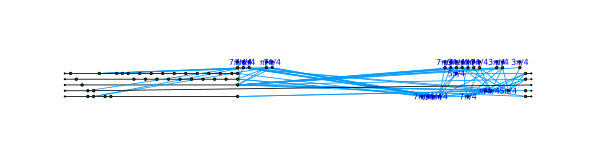

In [161]:
zx.draw(g2)

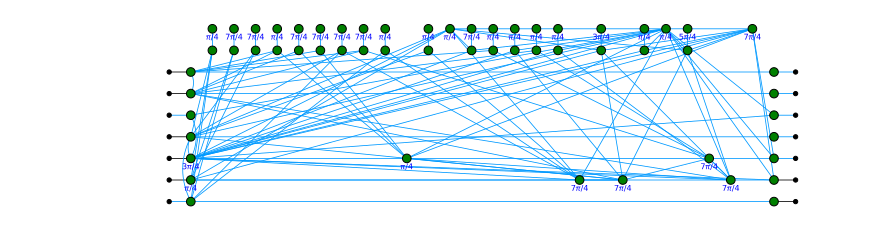

In [167]:
def sort_gadgets(g):
    rs = g.rows()
    ty = g.types()
    gadgets = {}
    for v in g.vertices():
        if len(list(g.neighbours(v))) == 1 and ty[v]==1:
            w = list(g.neighbours(v))[0]
            score = sum(rs[n] for n in g.neighbours(w))/len(list(g.neighbours(w)))
            gadgets[(w,v)] = score
    
    l = list(gadgets.items())
    l = sorted(l, key=lambda x: x[1])
    for i in range(len(l)):
        v,w = l[i][0]
        g.set_row(v, i+1.5)
        g.set_row(w, i+1.5)
    
sort_gadgets(g)
g.normalise()
zx.draw(g,figsize=(12,3))

# Todd on graph

In [8]:
from pyzx.circuit import ZPhase
from pyzx.linalg import Mat2
from pyzx.todd import todd_iter, MultiLinearPoly
#zx.todd.TOPT_LOCATION = os.path.expanduser("~/projects/pyzx/TOpt")
zx.todd.USE_REED_MULLER = False

def todd_on_graph(g):
    gadgets = {}
    t_nodes = []
    for v in g.vertices():
        if v not in g.inputs and v not in g.outputs and len(list(g.neighbours(v)))==1:
            if g.phase(v) != 0 and g.phase(v).denominator != 4: continue
            n = list(g.neighbours(v))[0]
            tgts = frozenset(set(g.neighbours(n)).difference({v}))
            gadgets[tgts] = (n,v)
        if g.phase(v) != 0 and g.phase(v).denominator == 4:
            t_nodes.append(v)
    
    if not gadgets:
        print("No phase gadgets found")
        return
    variables = set()
    for par in gadgets.keys():
        variables.update(par)
    
    for v in variables:
        if v in t_nodes:
            gadgets[frozenset({v})] = (v,v)
    
    targets = list(variables)
    n = len(targets)

    cols = []
    for par, (_,v) in gadgets.items():
        col = [0]*n
        for t in par:
            col[targets.index(t)] = 1
        phase = g.phase(v)
        for i in range(phase.numerator): cols.append(col)
        #cols.append(col)
    parmatrix = Mat2(cols).transpose()
    print(parmatrix.rows(), parmatrix.cols())
    #print(parmatrix)
    m2 = todd_iter(parmatrix)
    print(m2.rows(), m2.cols())
    
    newgadgets = []
    phases = dict()
    for col in m2.transpose().data:
        if sum(col) == 1:
            i = next(i for i,a in enumerate(col) if a)
            v = targets[i]
            if v in t_nodes:
                phases[v] = Fraction(1,4)
            else:
                phases[v] = g.phase(v) + Fraction(1,4)
        else:
            newgadgets.append(frozenset([targets[i] for i,a in enumerate(col) if a]))
    
    p = zx.todd.MultiLinearPoly()
    p.add_par_matrix(parmatrix,False)
    p.add_par_matrix(m2,True)
    correction = p.to_clifford()
    add_czs = {}
    for clif in correction:
        if isinstance(clif, ZPhase):
            v = targets[clif.target]
            if v in phases:
                phases[v] += clif.phase
            else:
                if v in t_nodes:
                    phases[v] = clif.phase
                else:
                    phases[v] = g.phase(v) + clif.phase
        elif clif.name == 'CZ':
            v1,v2 = targets[clif.control], targets[clif.target]
            add_czs[(v1,v2)] = (0,1)
    
    for v in targets:
        if v in phases:
            g.set_phase(v, phases[v])
        else:
            if v in t_nodes:
                g.set_phase(v, 0)
    g.add_edge_table(add_czs)
    
    rs = g.rows()
    positions = set()
    for gadget, (n,v) in gadgets.items():
        if len(gadget) == 1: continue # T-node
        if gadget in newgadgets:
            positions.add(rs[v])
            g.set_phase(v, Fraction(1,4))
            newgadgets.remove(gadget)
        else:
            g.remove_vertices((n,v))
    
    edges = []
    for par in newgadgets:
        pos = sum(rs[t] for t in par)/len(par) + 0.5
        while pos in positions: pos += 0.5
        n = g.add_vertex(1, -1, pos)
        v = g.add_vertex(1, -2, pos, phase=Fraction(1,4))
        edges.append((n,v))
        positions.add(pos)
        for t in par: edges.append((n,t))
    g.add_edges(edges, 2)
    

g2 = g.copy()
#display(zx.draw(g2,labels=True))
zx.todd.todd_on_graph(g2)
zx.full_reduce(g2)
g2.normalise()
print(zx.tcount(g2))
# todd_on_graph(g2)
# zx.full_reduce(g2)
# g2.normalise()
# print(zx.tcount(g2))
#zx.draw(g2)

13


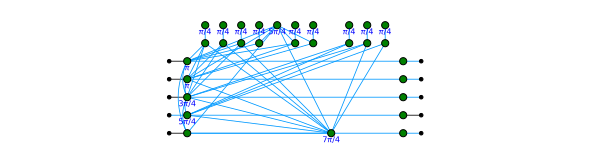

In [6]:
zx.draw(g2)

10
4
4


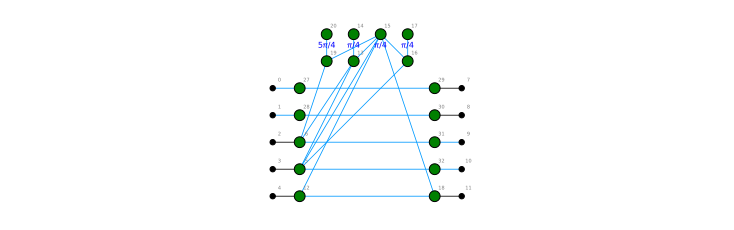

In [10]:
g3 = g2.copy()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
g3 = g3.adjoint()
try: c2 = zx.extract.streaming_extract(g3,allow_ancillae=True,quiet=True)
except: pass
zx.simplify.id_simp(g3, quiet=True)
g3.normalise()
print(zx.tcount(g3))
#zx.simplify.id_simp(g3, quiet=True)
zx.draw(g3,figsize=(10,3),labels=True)

In [3]:
random.seed(1344)
g = zx.generate.cliffordT(4,350,p_t=0.010)
zx.id_simp(g,quiet=True)
c = zx.Circuit.from_graph(g)
print(c.stats())
c2 = zx.optimize.basic_optimization(c.split_phase_gates())
print(c2.stats())
#zx.draw(c2,figsize=(25,5))

Circuit  on 4 qubits with 350 gates.
        4 is the T-count
        346 Cliffords among which 
        109 2-qubit gates and 0 Hadamard gates.
Circuit  on 4 qubits with 195 gates.
        4 is the T-count
        191 Cliffords among which 
        86 2-qubit gates and 43 Hadamard gates.


spider_simp: 58. 37. 17. 11. 4.  5 iterations
id_simp: 1.  1 iterations
spider_simp: 8. 1.  2 iterations
pivot_simp: 15. 6. 2. 2.  4 iterations
lcomp_simp: 33. 12. 11. 6. 6. 4. 4. 4. 3. 1. 1. 1. 1.  13 iterations


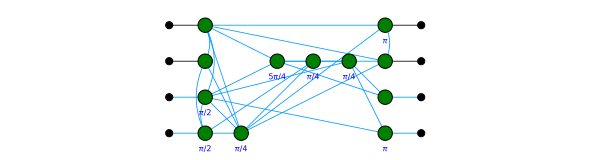

In [4]:
g2 = c2.to_graph()
zx.simplify.clifford_simp(g2)
g2.normalise()
zx.draw(g2)